In [1]:
import numpy as np
from matplotlib import pyplot as plt
from numpy import cos, sin, exp, pi
import scipy.linalg as la

In [2]:
def cheb(N):
    if N==0:
        D = 0
        x = 1
    else:
        x = cos(np.arange(0,N+1)*pi/N).reshape(N+1,1)
        c = (np.hstack([2,np.ones(N-1),2])*(-1)**(np.arange(0,N+1))).reshape(N+1,1)
        X = np.tile(x,(1,N+1))
        dX = X - X.T
        D = (c@((1/c).T))/(dX + np.eye(N+1))
        D = D - np.diag(np.sum(D.T,0))
    return D,x

def fourD(N):
    h = 2*pi/N
    x = h*np.arange(1,N+1).reshape(N,1)
    column = np.concatenate([[0] ,.5*(-1)**np.arange(1,N)*1/np.tan(np.arange(1,N)*h/2)]).reshape(N,1)
    D = la.toeplitz(column, np.vstack([column[0], column[-1:0:-1]]))
    return D,x

In [3]:
f = lambda x: exp(sin(x))
fp = lambda x: f(x)*(cos(x))

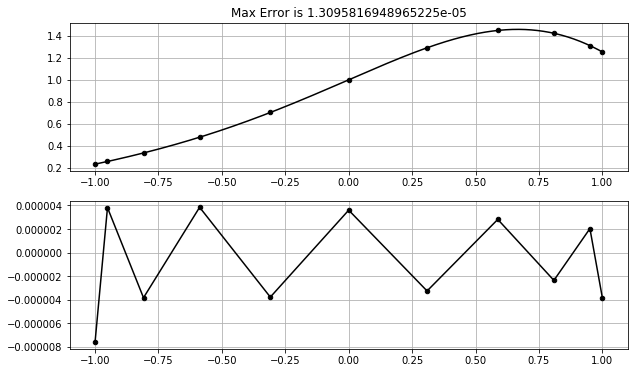

In [14]:
N = 10
D,x = cheb(N)
xx = np.linspace(np.min(x),np.max(x),1000)
plt.figure(figsize=[10,6])
plt.subplot(2,1,1)
plt.plot(xx,fp(xx),'k')
plt.plot(x,D@f(x),'.k',markersize=9)
plt.grid()
plt.title('Max Error is '+str(np.linalg.norm(fp(x) - D@f(x))))
plt.subplot(2,1,2)
plt.plot(x,fp(x)-D@f(x),'k.-',markersize=9)
plt.grid()

plt.show()

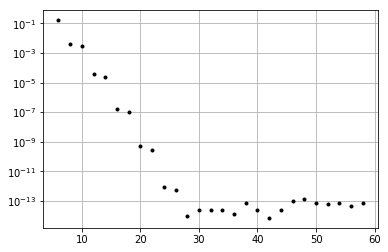

In [7]:
for n in range(3,30):
    N = 2*n
    Df,xf = fourD(N)
    plt.semilogy(N,np.linalg.norm(fp(xf)-Df@f(xf),np.inf),'k.')
plt.grid()
plt.show()

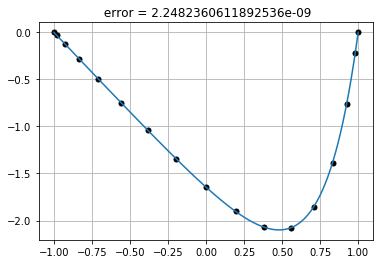

In [18]:
N = 16
D,x = cheb(N)
D2 = D@D
D2 = D2[1:-1,1:-1]

f = exp(4*x[1:N])
u = np.linalg.solve(D2,f)
u = np.vstack([0,u,0])
plt.plot(x,u,'.k',markersize=10)

xx = np.linspace(np.min(x),np.max(x),1000)
uu = np.polyval(np.polyfit(x.reshape(N+1,),u,N),xx)

plt.plot(xx,uu)
uuTrue = (exp(4*xx) - np.sinh(4)*xx-np.cosh(4))/16
plt.title(' error = '+ str(np.linalg.norm(uuTrue - uu)))
plt.grid()
plt.show()

In [47]:
N = 50
D,x = cheb(N)
D2 = D@D
D2 = D2[1:-1,1:-1]
lam,V = la.eig(D2)
ii = np.argsort(-lam)
lam = lam[ii]
V = V[:,ii]
print(lam.reshape(N-1,1)*4/pi**2)
print('-----------')
print((lam*4/pi**2+np.arange(1,N)**2).reshape(N-1,1))


[[-1.00000000e+00+0.j]
 [-4.00000000e+00+0.j]
 [-9.00000000e+00+0.j]
 [-1.60000000e+01+0.j]
 [-2.50000000e+01+0.j]
 [-3.60000000e+01+0.j]
 [-4.90000000e+01+0.j]
 [-6.40000000e+01+0.j]
 [-8.10000000e+01+0.j]
 [-1.00000000e+02+0.j]
 [-1.21000000e+02+0.j]
 [-1.44000000e+02+0.j]
 [-1.69000000e+02+0.j]
 [-1.96000000e+02+0.j]
 [-2.25000000e+02+0.j]
 [-2.56000000e+02+0.j]
 [-2.89000000e+02+0.j]
 [-3.24000000e+02+0.j]
 [-3.61000000e+02+0.j]
 [-4.00000000e+02+0.j]
 [-4.41000000e+02+0.j]
 [-4.83999997e+02+0.j]
 [-5.28999984e+02+0.j]
 [-5.76000093e+02+0.j]
 [-6.24999831e+02+0.j]
 [-6.76004101e+02+0.j]
 [-7.28951141e+02+0.j]
 [-7.84263475e+02+0.j]
 [-8.39512061e+02+0.j]
 [-9.04596013e+02+0.j]
 [-9.47183751e+02+0.j]
 [-1.05591324e+03+0.j]
 [-1.07359185e+03+0.j]
 [-1.27251819e+03+0.j]
 [-1.27960278e+03+0.j]
 [-1.60222002e+03+0.j]
 [-1.60697415e+03+0.j]
 [-2.12542674e+03+0.j]
 [-2.12901334e+03+0.j]
 [-3.02471831e+03+0.j]
 [-3.02916336e+03+0.j]
 [-4.73193390e+03+0.j]
 [-4.73639244e+03+0.j]
 [-8.675211

(-80.99999999999986+0j)


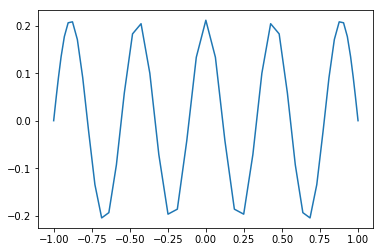

In [50]:
j = 8
print(lam[j]*4/pi**2)
ef = np.hstack([0,V[:,j],0])
plt.plot(x,ef)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: ComplexWarning: Casting complex values to real discards the imaginary part


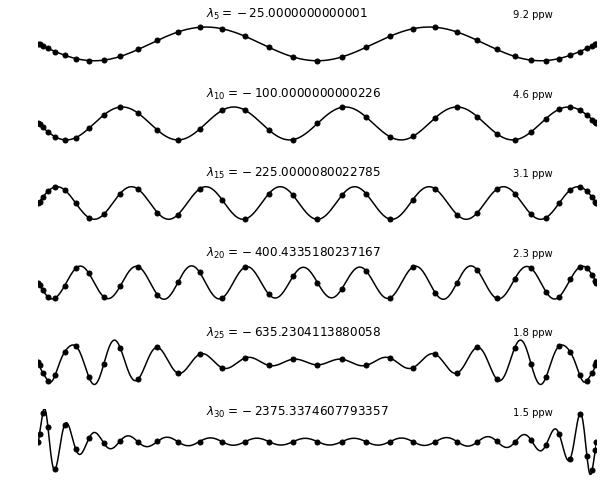

In [53]:
N = 36
D,x = cheb(N)
D2 = D@D
D2 = D2[1:-1,1:-1]
lam,V = la.eig(D2)
ii = np.argsort(-lam)
lam = lam[ii]
V = V[:,ii]

plt.figure(figsize=[10,10])
for j in range(4,30,5):
    u = np.hstack([0, V[:,j],0])
    plt.subplot(7,1,j/5+1)
    uu = np.polyval(np.polyfit(x.reshape(N+1,),u,N),xx)
    plt.plot(xx,uu,'k');
    plt.plot(x,u,'.k',markersize=10)
    plt.xlim(-1,1); 
    plt.ylim(-.5,.5); 
    plt.axis('off')
    plt.text(-.4,.4,'$\lambda_{'+str(j+1)+'}='+str('%.13f' % (lam[j]*4/pi**2))+'\frac{\pi^2}{4}$',fontsize=12) #typo in p15.m
    plt.text( .7,.4,str('%.1f' % (4*N/(pi*(j+1))))+' ppw')
plt.show()

array([[-7.99001270e+04+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
        ...,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j],
       [ 0.00000000e+00+0.j, -7.97269576e+04+0.j,  0.00000000e+00+0.j,
        ...,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j],
       [ 0.00000000e+00+0.j,  0.00000000e+00+0.j, -1.40262099e+04+0.j,
        ...,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j],
       ...,
       [ 0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
        ..., -9.86960440e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j],
       [ 0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
        ...,  0.00000000e+00+0.j, -2.22066099e+01+0.j,
         0.00000000e+00+0.j],
       [ 0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
        ...,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
        -3.94784176e+01+0.j]])